# Feature selection
* curse of dimensionality
    * problem visualizing - EDA = exploratory data analysis
        * identify outliers
        * detect anomalies
        * choosing functional form of relationships
        * 3+ dimensions hard to explore -> bad decisions for models
    * problem training - finding best parameters
        * convergence to right values
        * training requires long time - expensive on cloud
        * 
    * problem prediction
        * find instances simlar to training
        * search space is large if many features
        * leads to sparse data
        * higher risk of overfitting
    * solutions: 
        * features selection - which data is relevant
        * feature engineering - aggregating low level data
        * dimensionality reduction - reduce complexity without losing information
* reduce complexity
<img src='featselection.png' with=400 />
    * feature selection: use-cases: many x vars, littl informatio, some very meaningful, meaningful vars are idenpendent
    * dimensionality reduction - not covered in course
        * projection - find new better axes and re-orient data (e.g. PCA, factor analysis, LDA, QDA)
        * manifold - unroll data so that twists/turns are smoothed in lower dimensionality
            * works best for swiss roll or s-curve data (rolled-up data)
            * e.g. MDS (mutli-dimensional scaling), Isomap, LLE (locally linear embedding), Kernel PCA
        * autoencoding - build neural net to simplify data - try to find latent/signficant features and extract efficient representations
        * issues: information loss, performance degradation, computationally intensive, complex pipelines, tranformed features are hard to interpret
* filter methods - statistical hypothesis testing to determine which features are relevant
    * types
        * variance thresholding (high variance) - drop points that have simlar relationship with y, if feature has low variance not adding much information
        * chi-square test (test var independence from y) drop if feature and y are indpendent (categorical x and y)
            * univariate
            * sum of squared diff betwen observed and expected for data in all categories
            * output = chi<sup>2</sup> (&chi;<sup>2</sup>) and p-value that explains signficance
        * ANOVA - looks at multiple groups and compares means to produce a score and signficance value
            * mutlivariate
            * uses anova f-test - does man of y vary for each distinct value of x (drop if not)
        * mutual information - information obtained about 1 random variable from another (strength of relationship)
            * similar to anova f-test but captures non-linear dependencies too
        * others - not covered
    * cols selected indpendent of model
    * rely on statistical properties of features
    * ind (univariate) or jointly (multivariate)
* embedded methods
    * features selected during training (embedded within model) - assign importance to each feature
    * only some models perform feature selection
        * decision trees - more important features are used for early decisions (closer to root)
        * lasso regression - minimization of objective function with regularization function (l1 norm) - penalize complex models - cancels out features with small coefficients
            * model selection by tuning alpha &alpha;
* wrapper methods

# implementing feature selection
* correlations
* variance inflation
* univariate
* wrapper
* embedded

# feature correlations
## yellowbrick library - visual analysis and diagnostic tools

In [6]:
### pip install yellowbrick
### conda install -c districtdatalabs yellowbrick

In [7]:

import yellowbrick
yellowbrick.__version__

'1.2'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
diabetes = pd.read_csv('datasets/diabetes.csv')
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [10]:
diabetes_corr = diabetes.corr()
diabetes_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
import seaborn as sns

<AxesSubplot:>

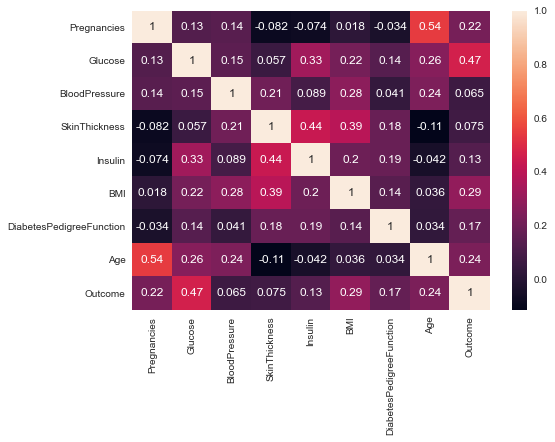

In [13]:
sns.heatmap(diabetes_corr, annot=True)

In [14]:
X = diabetes[['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction']]
Y = diabetes['Age']#any feature correlated with age

In [15]:
feature_names = X.columns
feature_names

Index(['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction'], dtype='object')

C:\Users\Rob.DESKTOP-HBG5EOT\.conda\envs\myenv\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


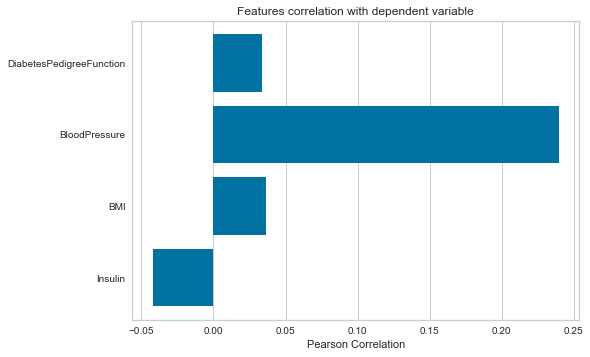

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [16]:
from yellowbrick.target import FeatureCorrelation
visualizer = FeatureCorrelation(labels=feature_names, method='pearson')
#pearson is default - measure of linear correlation -1 to 1
#correlations very sensitive to outliers
visualizer.fit(X,Y)
visualizer.poof()

In [26]:
pd.Series(dict(zip(visualizer.features_, visualizer.scores_)))#.to_frame().T

Insulin                    -0.042163
BMI                         0.036242
BloodPressure               0.239528
DiabetesPedigreeFunction    0.033561
dtype: float64

In [27]:
score_df = pd.DataFrame({'Feature_names': visualizer.features_, 'Scores': visualizer.scores_})
score_df.set_index('Feature_names')

,Scores
Feature_names,
Insulin,-0.042163
BMI,0.036242
BloodPressure,0.239528
DiabetesPedigreeFunction,0.033561


In [28]:
X = diabetes.drop('Outcome', axis=1)
Y = diabetes['Outcome']

In [29]:
feature_names = X.columns
feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

C:\Users\Rob.DESKTOP-HBG5EOT\.conda\envs\myenv\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


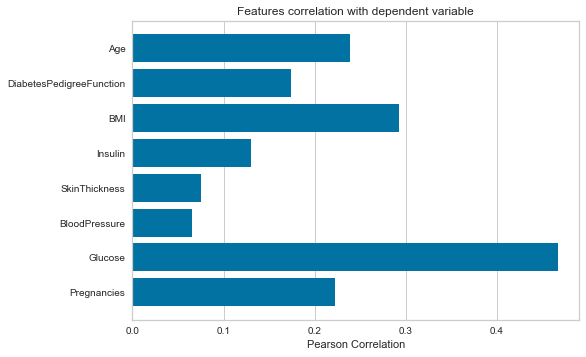

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [31]:
visualizer = FeatureCorrelation(lables=feature_names, method='pearson')
#pearson only works for metric vars - continuous numeric or dicotomous (two discrete values)
visualizer.fit(X,Y)
visualizer.poof()

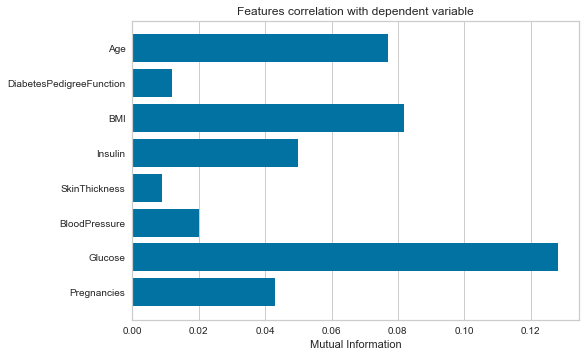

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Mutual Information'>

In [33]:
#pregnancies are discrete numeric values - need to specify such values when using mutual information
discrete_features = [False for _ in range(len(feature_names))]
discrete_features[0] = True
visualizer = FeatureCorrelation(method='mutual_info-classification',labels=feature_names)
visualizer.fit(X,Y, discrete_features=discrete_features, random_state=0)
visualizer.poof()

In [38]:
feature_to_plot = ['Age', 'BMI', 'Insulin', 'BloodPressure', 'Glucose']

C:\Users\Rob.DESKTOP-HBG5EOT\.conda\envs\myenv\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


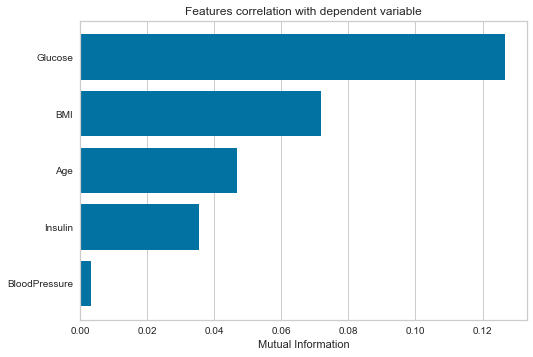

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Mutual Information'>

In [39]:
#visualize a subset fo features
visualizer = FeatureCorrelation(method='mutual_info-classification', feature_names = feature_to_plot, sort=True)
visualizer.fit(X,Y, random_state=0)
visualizer.poof()

## detecting multicollinearity

In [40]:
automobile = pd.read_csv('datasets/cars_processed.csv')
automobile.head(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,50
1,16.000000,8,304.0,150,3433,12.0,US,50
2,17.000000,8,302.0,140,3449,10.5,US,50
3,14.000000,8,454.0,220,4354,9.0,US,50
4,23.551429,8,440.0,215,4312,8.5,US,50


In [41]:
automobile.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,23.672514,5.410853,192.184755,103.645995,2965.387597,15.573643,43.917313
std,7.736579,1.667795,103.703706,38.128651,846.332848,2.746260,3.668715
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,38.000000
25%,17.600000,4.000000,102.500000,75.000000,2221.500000,13.900000,41.000000
50%,23.200000,4.000000,146.000000,92.000000,2790.000000,15.500000,44.000000
75%,29.000000,6.000000,260.000000,121.000000,3589.500000,17.050000,47.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,50.000000


In [45]:
#standardize all features
from sklearn import preprocessing
#scale - subrtract mean and divide by stdev
automobile[['Cylinders']] = preprocessing.scale(automobile[['Cylinders']].astype('float64'))
automobile[['Displacement']] = preprocessing.scale(automobile[['Displacement']].astype('float64'))
automobile[['Horsepower']] = preprocessing.scale(automobile[['Horsepower']].astype('float64'))
automobile[['Weight']] = preprocessing.scale(automobile[['Weight']].astype('float64'))
automobile[['Acceleration']] = preprocessing.scale(automobile[['Acceleration']].astype('float64'))
automobile[['Age']] = preprocessing.scale(automobile[['Age']].astype('float64'))

In [46]:
automobile.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
count,387.000000,3.870000e+02,3.870000e+02,3.870000e+02,3.870000e+02,3.870000e+02,3.870000e+02
mean,23.672514,3.672055e-17,3.672055e-17,1.101617e-16,1.101617e-16,2.203233e-16,8.078522e-16
std,7.736579,1.001294e+00,1.001294e+00,1.001294e+00,1.001294e+00,1.001294e+00,1.001294e+00
min,9.000000,-1.447404e+00,-1.199046e+00,-1.513838e+00,-1.600007e+00,-2.761372e+00,-1.615000e+00
25%,17.600000,-8.470340e-01,-8.659368e-01,-7.522710e-01,-8.800918e-01,-6.102152e-01,-7.962160e-01
50%,23.200000,-8.470340e-01,-4.459295e-01,-3.058349e-01,-2.075007e-01,-2.685060e-02,2.256768e-02
75%,29.000000,3.537065e-01,6.547792e-01,4.557326e-01,7.383860e-01,5.382839e-01,8.413513e-01
max,46.600000,1.554447e+00,2.537570e+00,3.318176e+00,2.572779e+00,3.363956e+00,1.660135e+00


In [47]:
automobile.shape

(387, 8)

In [49]:
from sklearn.model_selection import train_test_split
X = automobile.drop(['MPG', 'Origin'], axis=1)
Y = automobile['MPG']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=.2)

In [50]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [51]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.8015170212093495


In [52]:
y_pred = linear_model.predict(x_test)

In [53]:
from sklearn.metrics import r2_score
print("Testing score: ", r2_score(y_test, y_pred))


Testing score:  0.7017899911320253


In [59]:
def adjusted_r2(r_square, labels, features):
    #corrected goodness r-squared
    adj_r_square = 1- ((1-r_square)*(len(labels)-1)) / (len(labels) - features.shape[1]-1) #equation
    return adj_r_square

In [60]:
print("Adjusted_r2_score : ", adjusted_r2(r2_score(y_test, y_pred), y_test, x_test))

Adjusted_r2_score :  0.6765891453121965


In [62]:
features_corr = X.corr()#correlation above .9 means variables are likely to be collinear
# e.g. Displacement and WEight, cylinders, and horespower = same information
features_corr

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
Cylinders,1.000000,0.922633,0.811466,0.873029,-0.458161,0.321850
Displacement,0.922633,1.000000,0.894199,0.932822,-0.526901,0.357047
Horsepower,0.811466,0.894199,1.000000,0.863388,-0.670920,0.404458
Weight,0.873029,0.932822,0.863388,1.000000,-0.397181,0.299049
Acceleration,-0.458161,-0.526901,-0.670920,-0.397181,1.000000,-0.292705
Age,0.321850,0.357047,0.404458,0.299049,-0.292705,1.000000


In [63]:
abs(features_corr) > .8

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
Cylinders,True,True,True,True,False,False
Displacement,True,True,True,True,False,False
Horsepower,True,True,True,True,False,False
Weight,True,True,True,True,False,False
Acceleration,False,False,False,False,True,False
Age,False,False,False,False,False,True


In [65]:
trimmed_features_df = X.drop(['Cylinders', 'Displacement', 'Weight'], axis=1)# leave only 1 of collinear features

In [66]:
trimmed_features_corr = trimmed_features_df.corr()
trimmed_features_corr

,Horsepower,Acceleration,Age
Horsepower,1.000000,-0.670920,0.404458
Acceleration,-0.670920,1.000000,-0.292705
Age,0.404458,-0.292705,1.000000


In [67]:
abs(trimmed_features_corr) > .8

,Horsepower,Acceleration,Age
Horsepower,True,False,False
Acceleration,False,True,False
Age,False,False,True


In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#severity of mutlicollinearity in OLS regression
# relationship between all other fatures and the ith feature

In [71]:
vif = pd.DataFrame()
#calculated for each feature separately
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [72]:
vif['featuers'] = X.columns

In [73]:
vif.round(2)#1 = not correlated; 1-5 = moderately correlated; 5+ = highly correlated

,VIF Factor,featuers
0,6.84,Cylinders
1,16.10,Displacement
2,8.82,Horsepower
3,10.69,Weight
4,2.49,Acceleration
5,1.22,Age


In [74]:
X = X.drop(['Displacement', 'Weight'], axis=1)

In [75]:
vif = pd.DataFrame()
#calculated for each feature separately
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['featuers'] = X.columns
vif.round(2)

,VIF Factor,featuers
0,3.05,Cylinders
1,4.56,Horsepower
2,1.90,Acceleration
3,1.20,Age


In [76]:
X = automobile.drop(['MPG', 'Displacement', 'Weight', 'Origin'], axis=1)
Y = automobile['MPG']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

In [77]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [78]:
print('Training_score: ', linear_model.score(x_train, y_train))

Training_score:  0.7096506048609742


In [79]:
y_pred = linear_model.predict(x_test)

In [80]:
print("Testing score: ", r2_score(y_test, y_pred))

Testing score:  0.7824215970953944


In [81]:
print("Adjusted r2_score: ", adjusted_r2(r2_score(y_test, y_pred), y_test, x_test))
# when you omit highly correlated features adjusted r2 will be very close to r2

Adjusted r2_score:  0.7704994928266489


## missing value threshold + 
## variance threshold


In [83]:
import numpy as np

In [84]:
diabetes_data = pd.read_csv('datasets/diabetes.csv')
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [85]:
diabetes_data['Glucose'].replace(0,np.nan, inplace=True)
diabetes_data['BloodPressure'].replace(0,np.nan, inplace=True)
diabetes_data['SkinThickness'].replace(0,np.nan, inplace=True)
diabetes_data['Insulin'].replace(0,np.nan, inplace=True)
diabetes_data['BMI'].replace(0,np.nan, inplace=True)

In [86]:
diabetes_data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [87]:
#% of values missing
diabetes_data['Glucose'].isnull().sum()/len(diabetes_data)*100

0.6510416666666667

In [88]:
diabetes_data['BloodPressure'].isnull().sum()/len(diabetes_data)*100

4.557291666666666

In [89]:
diabetes_data['SkinThickness'].isnull().sum()/len(diabetes_data)*100

29.557291666666668

In [90]:
diabetes_data['Insulin'].isnull().sum()/len(diabetes_data)*100

48.69791666666667

In [91]:
diabetes_data['BMI'].isnull().sum()/len(diabetes_data)*100

1.4322916666666665

In [95]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [94]:
diabetes_data_trimmed = diabetes_data.dropna(thresh=int(diabetes_data.shape[0] *.9), axis=1)
# preserver fatures with 90%+ non-missing
diabetes_data_trimmed.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [96]:
diabetes_data = pd.read_csv('datasets/diabetes_processed.csv')#one with imputed values
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.000000,35.0,219.028414,33.6,0.627,50.0,1
1,1.0,85.0,66.000000,29.0,70.341550,26.6,0.351,31.0,0
2,8.0,183.0,64.000000,32.0,270.573172,23.3,0.672,32.0,1
3,1.0,89.0,66.000000,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.000000,35.0,168.000000,43.1,2.288,33.0,1
5,5.0,116.0,74.000000,32.0,127.840221,25.6,0.201,30.0,0
6,3.0,78.0,50.000000,32.0,88.000000,31.0,0.248,26.0,1
7,10.0,115.0,72.405184,32.0,136.570245,35.3,0.134,29.0,0
8,2.0,197.0,70.000000,45.0,543.000000,30.5,0.158,53.0,1
9,8.0,125.0,96.000000,32.0,155.571480,32.0,0.232,54.0,1


In [97]:
X = diabetes_data.drop('Outcome', axis=1)
Y=diabetes_data['Outcome']

In [98]:
X.var(axis=0)#calc variance for columns

Pregnancies                   11.354056
Glucose                      926.489244
BloodPressure                146.321591
SkinThickness                 78.969986
Insulin                     9449.130490
BMI                           47.270664
DiabetesPedigreeFunction       0.109779
Age                          138.303046
dtype: float64

In [100]:
#scale for same range prior to assessing variance
from sklearn.preprocessing import minmax_scale
X_scaled = pd.DataFrame(minmax_scale(X, feature_range=(0,10)), columns = X.columns)

In [101]:
X_scaled.var()#DiabetesPedigree has higher variance than was initially apparent

Pregnancies                 3.928739
Glucose                     3.856355
BloodPressure               1.523548
SkinThickness               0.933010
Insulin                     1.270004
BMI                         1.976851
DiabetesPedigreeFunction    2.001447
Age                         3.841751
dtype: float64

In [102]:
from sklearn.feature_selection import VarianceThreshold
select_features = VarianceThreshold(threshold=1.)

In [103]:
X_new = select_features.fit_transform(X_scaled)

In [104]:
X_new.shape#1 feature dropped

(768, 7)

In [106]:
var_df = pd.DataFrame({'feature names':list(X_scaled), 'variances':select_features.variances_})
var_df#SkinThickness was dropped

,feature names,variances
0,Pregnancies,3.923624
1,Glucose,3.851334
2,BloodPressure,1.521565
3,SkinThickness,0.931795
4,Insulin,1.268350
5,BMI,1.974277
6,DiabetesPedigreeFunction,1.998841
7,Age,3.836749


In [109]:
X_new = pd.DataFrame(X_new)
X_new.head()

,0,1,2,3,4,5,6
0,3.529412,6.709677,4.897959,2.731339,3.149284,2.344150,4.833333
1,0.588235,2.645161,4.285714,1.007569,1.717791,1.165670,1.666667
2,4.705882,8.967742,4.081633,3.328912,1.042945,2.536294,1.833333
3,0.588235,2.903226,4.285714,1.281848,2.024540,0.380017,0.000000
4,0.000000,6.000000,1.632653,2.139752,5.092025,9.436379,2.000000


In [111]:
selected_features = []
#if all values match then the original named column must be the selected col
for i in range(len(X_new.columns)):
    for j in range(len(X_scaled.columns)):
        if(X_new.iloc[:,i].equals(X_scaled.iloc[:,j])):
            selected_features.append(X_scaled.columns[j])
            
selected_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## univariate feature selection
examine each feature independently vs target

In [112]:
diabetes_data = pd.read_csv('datasets/diabetes.csv')
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [115]:
from sklearn.feature_selection import chi2, SelectKBest

In [117]:
X = diabetes_data.drop('Outcome', axis=1)
Y = diabetes_data['Outcome']
X.shape

(768, 8)

In [121]:
X = X.astype(np.float64)
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X,Y)
fit.scores_

array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
       2175.56527292,  127.66934333,    5.39268155,  181.30368904])

In [123]:
feature_score = pd.DataFrame()
for i in range(X.shape[1]):
    new=pd.DataFrame({'Features':X.columns[i], 'Score': fit.scores_[i]}, index=[i])
    feature_score = pd.concat([feature_score, new])
    
feature_score

,Features,Score
0,Pregnancies,111.519691
1,Glucose,1411.887041
2,BloodPressure,17.605373
3,SkinThickness,53.108040
4,Insulin,2175.565273
5,BMI,127.669343
6,DiabetesPedigreeFunction,5.392682
7,Age,181.303689


In [125]:
X_new = fit.transform(X)
X_new = pd.DataFrame(X_new)
X_new.head()

,0,1,2,3
0,148.0,0.0,33.6,50.0
1,85.0,0.0,26.6,31.0
2,183.0,0.0,23.3,32.0
3,89.0,94.0,28.1,21.0
4,137.0,168.0,43.1,33.0


In [130]:
#helper function - used later
def get_selected_features(X, X_new):
    selected_features = []
    for i in range(len(X_new.columns)):
        for j in range(len(X.columns)):
            if(X_new.iloc[:,i].equals(X.iloc[:,j])):
                print(X.columns[j])
                selected_features.append(X.columns[j])
    return selected_features

In [131]:
selected_features = get_selected_features(X, X_new)
selected_features

Glucose
Insulin
BMI
Age


['Glucose', 'Insulin', 'BMI', 'Age']

In [132]:
chi2_best_features = X[selected_features]

In [134]:
from sklearn.feature_selection import f_classif, SelectPercentile
#use anova F stat to determine relevant features
test = SelectPercentile(f_classif, percentile=80)
#select features in the top 80 pctile
fit=test.fit(X,Y)
fit.scores_

array([ 39.67022739, 213.16175218,   3.2569504 ,   4.30438091,
        13.28110753,  71.7720721 ,  23.8713002 ,  46.14061124])

In [136]:
X_new = fit.transform(X)
X_new = pd.DataFrame(X_new)
X_new.head()

,0,1,2,3,4,5
0,6.0,148.0,0.0,33.6,0.627,50.0
1,1.0,85.0,0.0,26.6,0.351,31.0
2,8.0,183.0,0.0,23.3,0.672,32.0
3,1.0,89.0,94.0,28.1,0.167,21.0
4,0.0,137.0,168.0,43.1,2.288,33.0


In [137]:
selected_features = get_selected_features(X, X_new)
selected_features

Pregnancies
Glucose
Insulin
BMI
DiabetesPedigreeFunction
Age


['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [138]:
f_classif_best_features = X[selected_features]

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
def build_model(X,Y, test_frac):
    x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=.2)
    model = LogisticRegression(solver='liblinear').fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Test score:", accuracy_score(y_test,y_pred))
    


In [144]:
build_model(X, Y, .2)#using all features

Test score: 0.7207792207792207


In [145]:
build_model(chi2_best_features, Y, .2)

Test score: 0.8181818181818182


In [146]:
build_model(f_classif_best_features, Y, .2)

Test score: 0.7207792207792207


## other feature selection options
* wrapper methods
    * recursive feature elimination
    * forward selection
    * backward elimination 
    
select based on model performance
* requires mlxtend package - machine learning extensions

In [147]:
#fails inline b/c there is a y/n prompt for conda installs (need -y to confirm)
#!conda install -n myenv -y -c conda-forge mlxtend

^C


In [148]:
diabetes_data = pd.read_csv('datasets/diabetes.csv')
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [150]:
X = diabetes_data.drop('Outcome', axis=1)
Y = diabetes_data['Outcome']
from sklearn.feature_selection import RFE #recusklearnearnve feature elimination - prune least important feature each step
#requries trained model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression(solver='liblinear')
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X,Y)#diff subsets of features
print("Num features: ", fit.n_features_)
print("selected features: ", fit.support_)
print("feature rankings: ", fit.ranking_)

Num features:  4
selected features:  [ True  True False False False  True  True False]
feature rankings:  [1 1 2 4 5 1 1 3]


In [151]:
feature_rank = pd.DataFrame({'columns':X.columns, 'ranking': fit.ranking_, 'selected': fit.support_})
feature_rank

,columns,ranking,selected
0,Pregnancies,1,True
1,Glucose,1,True
2,BloodPressure,2,False
3,SkinThickness,4,False
4,Insulin,5,False
5,BMI,1,True
6,DiabetesPedigreeFunction,1,True
7,Age,3,False


In [153]:
recursive_feature_names = feature_rank.loc[feature_rank['selected']==True]
recursive_feature_names

,columns,ranking,selected
0,Pregnancies,1,True
1,Glucose,1,True
5,BMI,1,True
6,DiabetesPedigreeFunction,1,True


In [154]:
X[recursive_feature_names['columns'].values].head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction
0,6,148,33.6,0.627
1,1,85,26.6,0.351
2,8,183,23.3,0.672
3,1,89,28.1,0.167
4,0,137,43.1,2.288


In [155]:
recursive_features = X[recursive_feature_names['columns'].values] #used later

In [159]:
%%time
from mlxtend.feature_selection import SequentialFeatureSelector #forward and backward
from sklearn.ensemble import RandomForestClassifier
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_estimators = 10),
                                             k_features = 4, forward=True, scoring='accuracy', cv=4)
features = feature_selector.fit(np.array(X), Y)
forward_elimination_feature_names = list(X.columns[list(features.k_feature_idx_)])
forward_elimination_feature_names

Wall time: 1.6 s


['Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction']

In [160]:
forward_elimination_features = X[forward_elimination_feature_names]

In [162]:
%%time
#backward elimination
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_estimators = 10),
                                             k_features = 4, forward=False, scoring='accuracy', cv=4)
features = feature_selector.fit(np.array(X), Y)
back_elimination_feature_names = list(X.columns[list(features.k_feature_idx_)])
back_elimination_feature_names

Wall time: 1.75 s


['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction', 'Age']

In [163]:
back_elimination_features = X[back_elimination_feature_names]

In [164]:
#same as prior
def build_model(X,Y, test_frac):
    x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=.2)
    model = LogisticRegression(solver='liblinear').fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Test score:", accuracy_score(y_test,y_pred))
    

In [165]:
build_model(X, Y, .2)

Test score: 0.8571428571428571


In [166]:
build_model(recursive_features, Y, .2)

Test score: 0.7792207792207793


In [167]:
build_model(forward_elimination_features, Y, .2)

Test score: 0.7662337662337663


In [168]:
build_model(back_elimination_features, Y, .2)

Test score: 0.7662337662337663


## embedded techniques

In [169]:
automobile = pd.read_csv('datasets/cars_processed.csv')
automobile.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,50
1,16.000000,8,304.0,150,3433,12.0,US,50
2,17.000000,8,302.0,140,3449,10.5,US,50
3,14.000000,8,454.0,220,4354,9.0,US,50
4,23.551429,8,440.0,215,4312,8.5,US,50
5,14.000000,8,455.0,225,4425,8.5,US,50
6,15.000000,8,390.0,190,3850,8.5,US,50
7,15.000000,8,383.0,170,3563,10.0,US,50
8,14.000000,5,340.0,160,3609,8.0,US,50
9,23.551429,8,400.0,150,3761,9.5,US,50


In [172]:
X = automobile.drop(['MPG', 'Origin'], axis=1)
Y = automobile['MPG']
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.8)
#not splitting b/c this is only being used for feature selection
lasso.fit(X,Y)

Lasso(alpha=0.8)

In [173]:
predictors = X.columns
coef = pd.Series(lasso.coef_, predictors).sort_values()
print(coef)#unimportant features are close to 0

Age            -0.673784
Weight         -0.006603
Horsepower     -0.004511
Cylinders      -0.000000
Acceleration    0.000000
Displacement    0.001366
dtype: float64


In [177]:
lasso_features = ['Age', 'Weight']
X[lasso_features].head()

,Age,Weight
0,50,3504
1,50,3433
2,50,3449
3,50,4354
4,50,4312


In [178]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(max_depth=4)
decision_tree.fit(X,Y)


DecisionTreeRegressor(max_depth=4)

In [180]:
predictors = X.columns
coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
print(coef)

Displacement    0.645590
Horsepower      0.177081
Age             0.112716
Weight          0.058285
Acceleration    0.006328
Cylinders       0.000000
dtype: float64


In [181]:
decision_tree_features = ['Displacement', 'Horsepower']
X[decision_tree_features].head()

,Displacement,Horsepower
0,307.0,130
1,304.0,150
2,302.0,140
3,454.0,220
4,440.0,215


In [182]:
#same as prior except LinearRegression
def build_model(X,Y, test_frac):
    x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=.2)
    model = LinearRegression().fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Test score:", r2_score(y_test,y_pred))

In [183]:
build_model(X[lasso_features], Y, .2)

Test score: 0.7750526226756836


In [184]:
build_model(X[decision_tree_features], Y, .2)

Test score: 0.5529389123286986
